# Plotting the results of spacetrees

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dispersal rate

First we load the dispersal rates

In [13]:
prefix = 'data/test_with_ancients'
filename = prefix + '_10M_%sT.sigma'
sigmas = []
Ts = [None,10000] #time cutoffs
for T in Ts:
    sigmas.append(np.loadtxt(filename %T, delimiter=','))

And we can compare them to the simulated truth

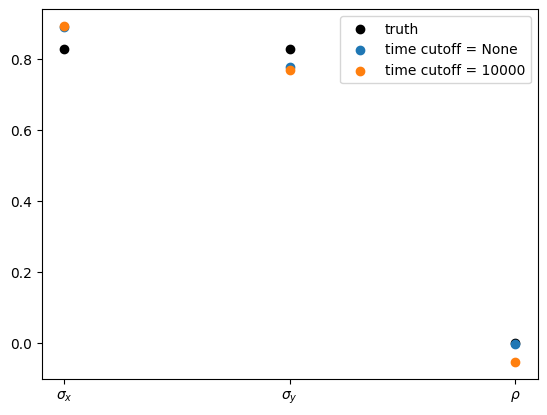

In [14]:
truth = (0.75**2 + 0.5**2/2)**0.5 #square root of (mother-offspring var plus half of father-offspring var)
plt.scatter([1,2,3],[truth,truth,0], label='truth', c='k')
for i,sigma in enumerate(sigmas):
    plt.scatter([1,2,3], sigma[:3], label='time cutoff = %s' %str(Ts[i]))
plt.xticks([1,2,3], labels=[r'$\sigma_x$',r'$\sigma_y$',r'$\rho$'])
plt.legend()
plt.show()

We see we do a decent job estimating the standard deviations in x and y movements, $\sigma_x$ and $\sigma_y$, and in this case underestimate the correlation in movement between x and y, $\rho$. The time cutoff isn't having a big effect here. Perhaps an even smaller value, like 1000, would make more of a difference.

we get pretty similar estimates without the ancient samples:

In [17]:
prefix = 'data/test'
filename = prefix + '_10M_%sT.sigma'
sigmas = []
Ts = [None,10000] #time cutoffs
for T in Ts:
    sigmas.append(np.loadtxt(filename %T, delimiter=','))

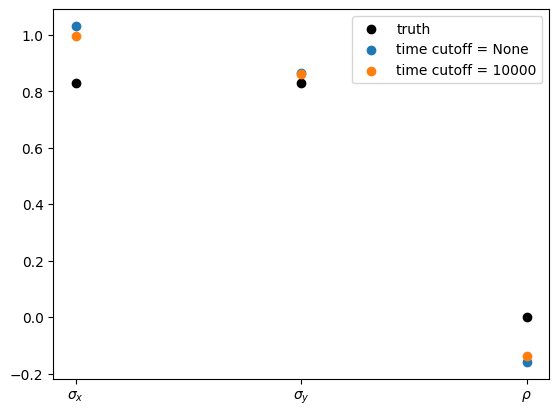

In [18]:
truth = (0.75**2 + 0.5**2/2)**0.5 #square root of (mother-offspring var plus half of father-offspring var)
plt.scatter([1,2,3],[truth,truth,0], label='truth', c='k')
for i,sigma in enumerate(sigmas):
    plt.scatter([1,2,3], sigma[:3], label='time cutoff = %s' %str(Ts[i]))
plt.xticks([1,2,3], labels=[r'$\sigma_x$',r'$\sigma_y$',r'$\rho$'])
plt.legend()
plt.show()

## Ancestor locations

Load the data

In [57]:
prefix = 'data/test_with_ancients'
locations = np.loadtxt(prefix + '.locations') #sample locations
locations_with_ancients = locations

In [58]:
T = None #time cutoff
loci = [1,11,21,31,41,51,61,71,81,91] #loci at which we located ancestors
sample = 0 #sample we are interested in plotting

ancestor_locations = []
for locus in loci:
    with open(prefix + '_chr1_%dlocus_10M_%sT_Alls_Allt.locs' %(locus,str(T)), 'r') as f:
        for line in f:
            if line.split(',')[0]==str(sample):
                ancestor_locations.append([float(i) for i in line.strip().split(',')[1:]]) #time,x,y
ancestor_locations = np.array(ancestor_locations)
ancestor_locations_with_ancients = ancestor_locations

And now plot the distribution of ancestor locations over loci at various times

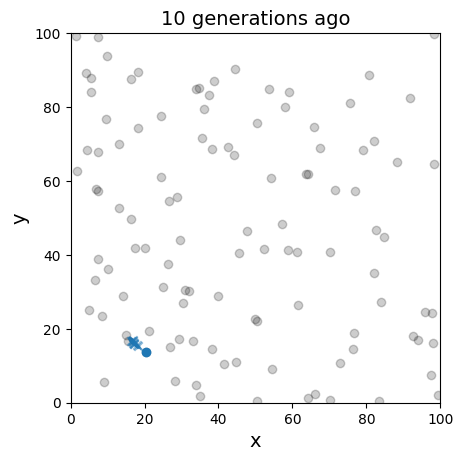

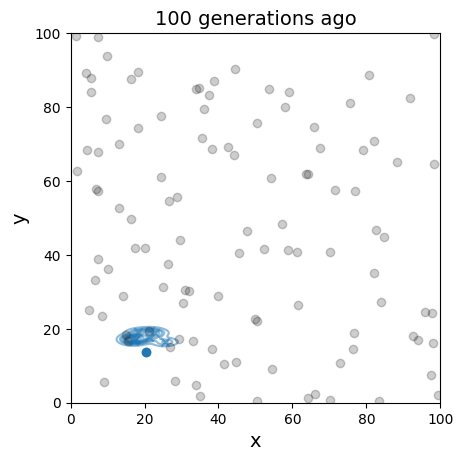

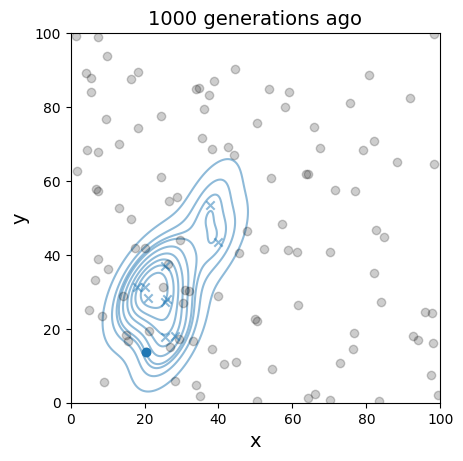

In [59]:
ancestor_times = np.unique(ancestor_locations[:,0]) #times we are looking at
sample_color = plt.get_cmap('tab10')(0) #choose your color

for i,t in enumerate(ancestor_times):
    
    fig = plt.figure() #set up figure
    ax = fig.add_subplot(111, aspect='equal') #and axis
    
    ax.scatter(locations[:,0], locations[:,1], color='k', alpha=0.1) #all samples
    ax.scatter(locations[sample,0], locations[sample,1], color=sample_color, alpha=1) #focal sample

    ax.scatter(ancestor_locations[i::3,1],ancestor_locations[i::3,2], color=sample_color, alpha=0.5, marker='x')
    sns.kdeplot(x=ancestor_locations[i::3,1], y=ancestor_locations[i::3,2], ax=ax, zorder=0, color=sample_color, alpha=0.5) #inferred ancestor distribution
    
    # aesthetics
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.title('%d generations ago' %t, fontsize=14)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    
    plt.show()

Here we see that these ancestors of the sample only start to spread out and move away after 100s of generations. It might make more sense then to use a linear time scale for the ancestor times (eg, 1000, 2000, ...). And using a larger chromosome with more loci, or additional chromosomes, would allow us to locate ancestors at more unrelated parts of the genome, which may spread out from each other faster. But I hope this gets you started.

We get much the same without the ancient samples

In [60]:
prefix = 'data/test'
locations = np.loadtxt(prefix + '.locations') #sample locations

In [61]:
T = None #time cutoff
loci = [1,11,21,31,41,51,61,71,81,91] #loci at which we located ancestors
sample = 0 #sample we are interested in plotting

ancestor_locations = []
for locus in loci:
    with open(prefix + '_chr1_%dlocus_10M_%sT_Alls_Allt.locs' %(locus,str(T)), 'r') as f:
        for line in f:
            if line.split(',')[0]==str(sample):
                ancestor_locations.append([float(i) for i in line.strip().split(',')[1:]]) #time,x,y
ancestor_locations = np.array(ancestor_locations)

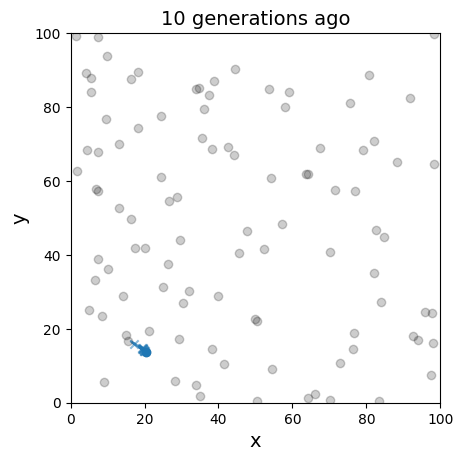

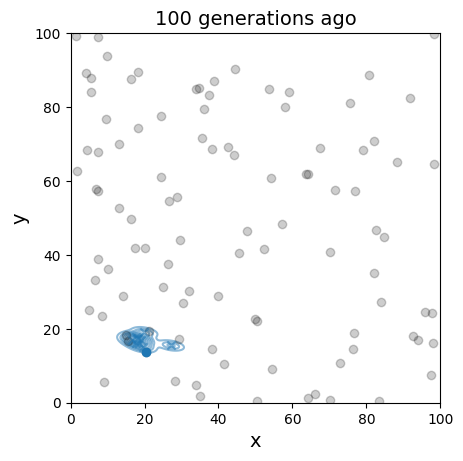

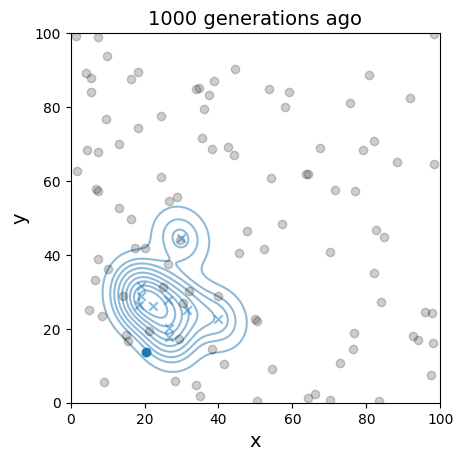

In [62]:
ancestor_times = np.unique(ancestor_locations[:,0]) #times we are looking at
sample_color = plt.get_cmap('tab10')(0) #choose your color

for i,t in enumerate(ancestor_times):
    
    fig = plt.figure() #set up figure
    ax = fig.add_subplot(111, aspect='equal') #and axis
    
    ax.scatter(locations[:,0], locations[:,1], color='k', alpha=0.1) #all samples
    ax.scatter(locations[sample,0], locations[sample,1], color=sample_color, alpha=1) #focal sample

    ax.scatter(ancestor_locations[i::3,1],ancestor_locations[i::3,2], color=sample_color, alpha=0.5, marker='x')
    sns.kdeplot(x=ancestor_locations[i::3,1], y=ancestor_locations[i::3,2], ax=ax, zorder=0, color=sample_color, alpha=0.5) #inferred ancestor distribution
    
    # aesthetics
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.title('%d generations ago' %t, fontsize=14)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    
    plt.show()

Directly compare estimates at each locus with and without ancient samples

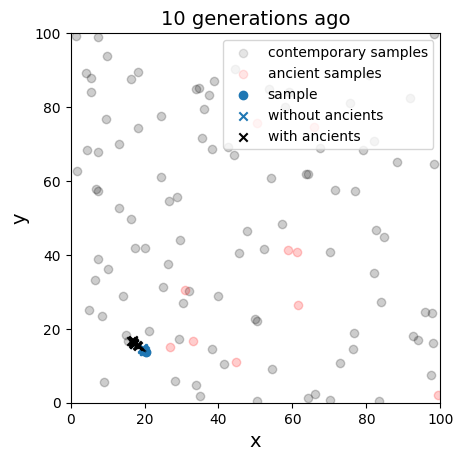

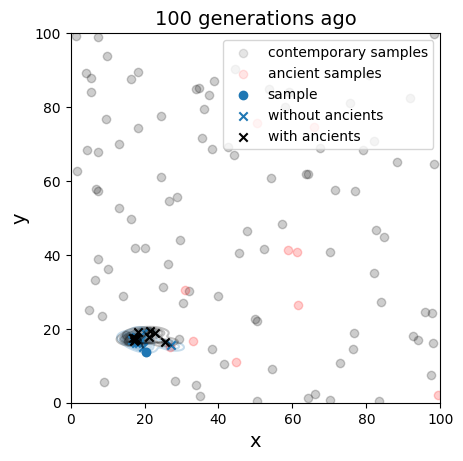

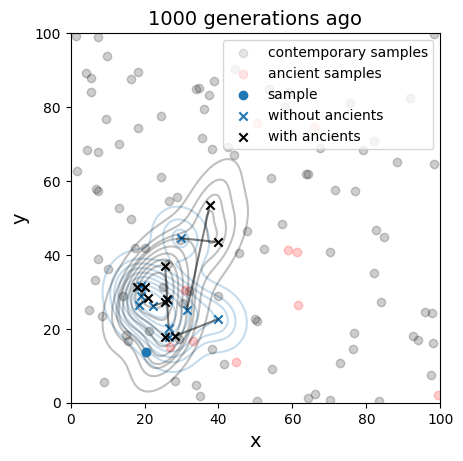

In [65]:
ancestor_times = np.unique(ancestor_locations[:,0]) #times we are looking at
sample_color = plt.get_cmap('tab10')(0) #choose your color

for i,t in enumerate(ancestor_times):
    
    fig = plt.figure() #set up figure
    ax = fig.add_subplot(111, aspect='equal') #and axis
    
    ax.scatter(locations[:,0], locations[:,1], color='k', alpha=0.1, label='contemporary samples') #all samples
    ax.scatter([i for i in locations_with_ancients[:,0] if i not in locations[:,0]], [i for i in locations_with_ancients[:,1] if i not in locations[:,1]], color='red', alpha=0.1, label='ancient samples') #all samples
    ax.scatter(locations[sample,0], locations[sample,1], color=sample_color, alpha=1, label='sample') #focal sample

    ax.scatter(ancestor_locations[i::3,1],ancestor_locations[i::3,2], color=sample_color, marker='x', label='without ancients')
    ax.scatter(ancestor_locations_with_ancients[i::3,1],ancestor_locations_with_ancients[i::3,2], color='k', marker='x', label='with ancients')
    sns.kdeplot(x=ancestor_locations[i::3,1], y=ancestor_locations[i::3,2], ax=ax, zorder=0, color=sample_color, alpha=0.25) #inferred ancestor distribution
    sns.kdeplot(x=ancestor_locations_with_ancients[i::3,1], y=ancestor_locations_with_ancients[i::3,2], ax=ax, zorder=0, color='k', alpha=0.25) #inferred ancestor distribution
    ax.plot([ancestor_locations[i::3,1],ancestor_locations_with_ancients[i::3,1]],[ancestor_locations[i::3,2],ancestor_locations_with_ancients[i::3,2]], '-k', alpha=0.5)
    
    # aesthetics
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.title('%d generations ago' %t, fontsize=14)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend()
    
    plt.show()

# debugging

In [3]:
from tsconvert import from_newick

In [50]:
with open('data/test_with_ancients_chr1_11locus_10M.newick', mode='r') as f:
    next(f)
    for i,line in enumerate(f):
        if i>1:
            break
        string = line.split()[4]
        ts = from_newick(string)

In [51]:
samples = [i for i in ts.samples()]

In [52]:
cont_samples = [i for i in ts.samples() if ts.node(i).time<0.1] 

In [53]:
len(cont_samples)

220

In [55]:
max([ts.node(i).time for i in ts.samples()])

0.0014550000050803646

In [1]:
import tskit

In [61]:
ts = tskit.load('data/test_with_ancients_chr1_1locus_10M.trees')

In [62]:
ts

In [63]:
samples = [i for i in ts1.samples()]

In [64]:
cont_samples = [i for i in ts.samples() if ts.node(i).time<0.1] 

In [65]:
len(cont_samples)

220

In [67]:
max([ts.node(i).time for i in ts.samples()])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [7]:
ts = tskit.load('../spacetrees-ancients/data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_0.75SIGMAdisp_0selfing_40000MAXT_0rep_10000Ne_1e-08U_100d_100k_2G_5numiter_0.5threshold_extracted.trees')

In [8]:
ts

In [9]:
cont_samples = [i for i in ts.samples() if ts.node(i).time<0.1] 

In [10]:
len(cont_samples)

200

In [11]:
max([ts.node(i).time for i in ts.samples()])

1000.0

In [ ]:
ts